In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import chardet


In [124]:
with open("data.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
train_data=pd.read_csv("data.csv",encoding='ISO-8859-1')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109902 entries, 0 to 109901
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      109902 non-null  int64 
 1   label   109902 non-null  int64 
 2   tweet   109901 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [ ]:
train_data['tweet'].value_counts()

I choose the path of hope and light. Thanks for this powerful message ðºð¸@IAMJHUD @bep #VoteLove #Biden \nhttps://t.co/88Zm1lmBuF via @YouTube    1
@realDonaldTrump #MaraLago is built on sand in the path of #hurricanes.  That explains why #Trump is a fool aboutâ¦ https://t.co/9pUUF4X5a9           1
The #SecularVoicesSurvey finds that among #secularvoters #JoeBiden is winning 68% vs. #DonaldTrump's 30%. Theâ¦ https://t.co/vqDtTZrMVe               1
hell yeah #MAGA #Trump                                                                                                                                 1
#Trump is losing and he knows it.  That's the only reason he is trying to spread distrust of this election.  He's tâ¦ https://t.co/WQhgTbB0T6         1
                                                                                                                                                      ..
https://t.co/264AuG3rvU LIKE THIS VIDEO #zoomcodes #money #trump #biden #twitter #

In [ ]:
train_data.head(10)

,id,label,tweet
0,0,0,#trump is better than #Biden #ImOneHundredPerc...
1,1,1,The VA was horrible under the #Obama and #Bide...
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump
4,4,1,Theyâve scared you! Caused you to be angry w...
5,5,1,... 4/6\nChristian? Can we really support any...
6,6,0,#JoeBiden is clearly showing signs of being #S...
7,7,0,@SenSchumer Can someone tell my story where I ...
8,8,1,"This ainât hard, folks. Trump wants your vot..."
9,9,1,News outlets decline to send staff to travel w...


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109902 entries, 0 to 109901
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      109902 non-null  int64 
 1   label   109902 non-null  int64 
 2   tweet   109901 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


# Cleaning the data

In [ ]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [ ]:

def process_tweet():
    #return ",".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower().split()))
    #train_data['processed_tweets'] = train_data['tweet'].str.replace('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])', '')
    train_data['processed_tweets'] = train_data['tweet'].str.replace('[^A-Za-z0-9 ]', '')
    train_data['processed_tweets'] = train_data['processed_tweets'].str.replace('@[a-zA-Z0-9]+', '')

In [ ]:
import re

re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "","")

''

In [ ]:
#train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)
process_tweet()

train_data.head(10)

,id,label,tweet,processed_tweets
0,0,0,#trump is better than #Biden #ImOneHundredPerc...,trump is better than Biden ImOneHundredPercent...
1,1,1,The VA was horrible under the #Obama and #Bide...,The VA was horrible under the Obama and Biden ...
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...,Biden biden and obama killed VETS DNC SAY NO ...
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump,Too Funny Biden Democrats Patriot Trump
4,4,1,Theyâve scared you! Caused you to be angry w...,Theyve scared you Caused you to be angry with ...
5,5,1,... 4/6\nChristian? Can we really support any...,46Christian Can we really support any of tho...
6,6,0,#JoeBiden is clearly showing signs of being #S...,JoeBiden is clearly showing signs of being Sen...
7,7,0,@SenSchumer Can someone tell my story where I ...,SenSchumer Can someone tell my story where I h...
8,8,1,"This ainât hard, folks. Trump wants your vot...",This aint hard folks Trump wants your vote eve...
9,9,1,News outlets decline to send staff to travel w...,News outlets decline to send staff to travel w...


In [ ]:
train_data.head(10)

,id,label,tweet,processed_tweets
0,0,0,#trump is better than #Biden #ImOneHundredPerc...,trump is better than Biden ImOneHundredPercent...
1,1,1,The VA was horrible under the #Obama and #Bide...,The VA was horrible under the Obama and Biden ...
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...,Biden biden and obama killed VETS DNC SAY NO ...
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump,Too Funny Biden Democrats Patriot Trump
4,4,1,Theyâve scared you! Caused you to be angry w...,Theyve scared you Caused you to be angry with ...
5,5,1,... 4/6\nChristian? Can we really support any...,46Christian Can we really support any of tho...
6,6,0,#JoeBiden is clearly showing signs of being #S...,JoeBiden is clearly showing signs of being Sen...
7,7,0,@SenSchumer Can someone tell my story where I ...,SenSchumer Can someone tell my story where I h...
8,8,1,"This ainât hard, folks. Trump wants your vot...",This aint hard folks Trump wants your vote eve...
9,9,1,News outlets decline to send staff to travel w...,News outlets decline to send staff to travel w...


In [ ]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109902 entries, 0 to 109901
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                109902 non-null  int64 
 1   label             109902 non-null  int64 
 2   tweet             109901 non-null  object
 3   processed_tweets  109901 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.4+ MB


In [ ]:
train_data['processed_tweets'] = train_data['processed_tweets'].astype(str).str.split()
train_data.head(10)


,id,label,tweet,processed_tweets
0,0,0,#trump is better than #Biden #ImOneHundredPerc...,"[trump, is, better, than, Biden, ImOneHundredP..."
1,1,1,The VA was horrible under the #Obama and #Bide...,"[The, VA, was, horrible, under, the, Obama, an..."
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...,"[Biden, biden, and, obama, killed, VETS, DNC, ..."
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump,"[Too, Funny, Biden, Democrats, Patriot, Trump]"
4,4,1,Theyâve scared you! Caused you to be angry w...,"[Theyve, scared, you, Caused, you, to, be, ang..."
5,5,1,... 4/6\nChristian? Can we really support any...,"[46Christian, Can, we, really, support, any, o..."
6,6,0,#JoeBiden is clearly showing signs of being #S...,"[JoeBiden, is, clearly, showing, signs, of, be..."
7,7,0,@SenSchumer Can someone tell my story where I ...,"[SenSchumer, Can, someone, tell, my, story, wh..."
8,8,1,"This ainât hard, folks. Trump wants your vot...","[This, aint, hard, folks, Trump, wants, your, ..."
9,9,1,News outlets decline to send staff to travel w...,"[News, outlets, decline, to, send, staff, to, ..."


In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
train_data['processed_tweets']= train_data['processed_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
train_data.head(10)

,id,label,tweet,processed_tweets
0,0,0,#trump is better than #Biden #ImOneHundredPerc...,"[trump, is, better, than, biden, imonehundredp..."
1,1,1,The VA was horrible under the #Obama and #Bide...,"[the, va, was, horribl, under, the, obama, and..."
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...,"[biden, biden, and, obama, kill, vet, dnc, say..."
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump,"[too, funni, biden, democrat, patriot, trump]"
4,4,1,Theyâve scared you! Caused you to be angry w...,"[theyv, scare, you, caus, you, to, be, angri, ..."
5,5,1,... 4/6\nChristian? Can we really support any...,"[46christian, can, we, realli, support, ani, o..."
6,6,0,#JoeBiden is clearly showing signs of being #S...,"[joebiden, is, clear, show, sign, of, be, seni..."
7,7,0,@SenSchumer Can someone tell my story where I ...,"[senschum, can, someon, tell, my, stori, where..."
8,8,1,"This ainât hard, folks. Trump wants your vot...","[this, aint, hard, folk, trump, want, your, vo..."
9,9,1,News outlets decline to send staff to travel w...,"[news, outlet, declin, to, send, staff, to, tr..."


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")


stopwords = nltk.corpus.stopwords.words('english')
import string

def process(text):
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    nopunc = " ".join(nopunc)
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

train_data['processed_tweets'] = train_data['processed_tweets'].apply(process)
train_data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,label,tweet,processed_tweets
0,0,0,#trump is better than #Biden #ImOneHundredPerc...,"[biden, imonehundredpercentsurethat, trump, be..."
1,1,1,The VA was horrible under the #Obama and #Bide...,"[biden, administr, obama, va, horribl]"
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...,"[biden, obama, dnc, kill, vet, say, joebiden]"
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump,"[biden, patriot, trump, democrat, funni]"
4,4,1,Theyâve scared you! Caused you to be angry w...,"[trump, imagin, joe, biden, scare, caus, vote,..."
5,5,1,... 4/6\nChristian? Can we really support any...,"[realli, ani, justifi, anger, biden, support, ..."
6,6,0,#JoeBiden is clearly showing signs of being #S...,"[httpstcouf1l8bn1hn, sign, 1st, presiden, take..."
7,7,0,@SenSchumer Can someone tell my story where I ...,"[health, biden, insur, stori, httpstco6eukefxb..."
8,8,1,"This ainât hard, folks. Trump wants your vot...","[even, hard, want, trump, vote, folk, aint, ki..."
9,9,1,News outlets decline to send staff to travel w...,"[biden, trump, coronavirus, lack, declin, staf..."


In [ ]:
def join_tokens(tweet):
    return " ".join(tweet)

train_data['processed_tweets'] = train_data['processed_tweets'].apply(join_tokens)

In [ ]:
train_data.head(10)

,id,label,tweet,processed_tweets
0,0,0,#trump is better than #Biden #ImOneHundredPerc...,biden imonehundredpercentsurethat trump better
1,1,1,The VA was horrible under the #Obama and #Bide...,biden administr obama va horribl
2,2,1,#Biden #biden and #obama killed VETS! @DNC SA...,biden obama dnc kill vet say joebiden
3,3,0,Too Funny! #Biden #Democrats #Patriot #Trump,biden patriot trump democrat funni
4,4,1,Theyâve scared you! Caused you to be angry w...,trump imagin joe biden scare caus vote httpstc...
5,5,1,... 4/6\nChristian? Can we really support any...,realli ani justifi anger biden support vote 46...
6,6,0,#JoeBiden is clearly showing signs of being #S...,httpstcouf1l8bn1hn sign 1st presiden take word...
7,7,0,@SenSchumer Can someone tell my story where I ...,health biden insur stori httpstco6eukefxb4a se...
8,8,1,"This ainât hard, folks. Trump wants your vot...",even hard want trump vote folk aint kill youbiden
9,9,1,News outlets decline to send staff to travel w...,biden trump coronavirus lack declin staff harr...


In [ ]:
train_data.to_csv('tweets_election.csv', header=False, mode='a')
pd.DataFrame({'id':train_data['id'],'tweet':train_data['tweet'],'processed tweet':train_data['processed_tweets']})

,id,tweet,processed tweet
0,0,#trump is better than #Biden #ImOneHundredPerc...,biden imonehundredpercentsurethat trump better
1,1,The VA was horrible under the #Obama and #Bide...,biden administr obama va horribl
2,2,#Biden #biden and #obama killed VETS! @DNC SA...,biden obama dnc kill vet say joebiden
3,3,Too Funny! #Biden #Democrats #Patriot #Trump,biden patriot trump democrat funni
4,4,Theyâve scared you! Caused you to be angry w...,trump imagin joe biden scare caus vote httpstc...
...,...,...,...
109897,109897,Report: #Republican #Trump Called U.S. WWI Vet...,pennsylvania us ohio florida trump loser repub...
109898,109898,Economy Smiles on #Trump Before Election Day. ...,elect trump httpstcosbphdd7fxd eeuu smile day ...
109899,109899,"TRUMPISTRAGIC: HI TAN-DIARRHEA FACE, SWIRL THA...",trumpistrag trump baldhead burnt swine swirl h...
109900,109900,Happy ð Birthday\n ð Ivkana ð\n...,u trump hitwil ur amp ahol birthday ivkana tru...


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data["processed_tweets"],train_data["label"], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(87921, 130470)
(87921, 130470)


In [ ]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)
y_test = np.nan_to_num(y_test)
x_test = np.nan_to_num(x_test)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(21981, 130470)
(21981, 130470)


# Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
y_train = np.nan_to_num(y_train)
x_train_tfidf = np.nan_to_num(x_train_tfidf)
model1 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model1.fit(x_train_tfidf,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
predDT = model1.predict(x_test_tfidf)

In [ ]:
c_m1 = confusion_matrix(y_test,predDT)
print(c_m1)

[[9342 1576]
 [2029 9034]]


In [ ]:
accuracy_score(y_test,predDT)

0.8359947227150721

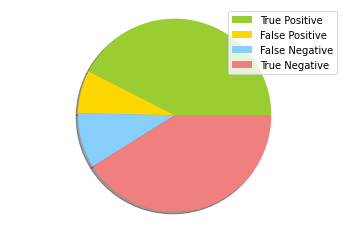

In [ ]:
labels = 'True Positive','False Positive','False Negative','True Negative'
a,b,c,d=c_m1[0][0],c_m1[0][1],c_m1[1][0],c_m1[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')

plt.show()

In [ ]:
tp,fp,fn,tn = c_m1[0][0],c_m1[0][1],c_m1[1][0],c_m1[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.8215636267698532
precision =  0.8556512181718263
F1_score =  0.8382610256180179


# K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [ ]:
K = [] 
training = [] 
test = [] 
scores = {} 
  
model2 = KNeighborsClassifier(n_neighbors = 330,  weights='uniform') 
model2.fit(x_train_tfidf,y_train) 
  
training_score = model2.score(x_train_tfidf,y_train) 
predKNN = model2.predict(x_test_tfidf)
test_score = model2.score(x_test_tfidf, y_test) 

training.append(training_score) 
test.append(test_score)
    


print(test)



[0.8620171966698512]


In [ ]:
c_m2 = confusion_matrix(y_test,predKNN)
print(c_m2)

print("\n\nAccuracy:")
print(test)

[[9819 1099]
 [1934 9129]]


Accuracy:
[0.8620171966698512]


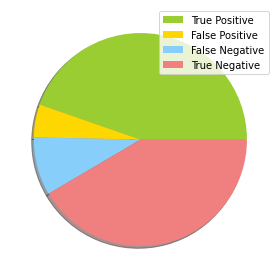

recall =  0.8354462690376925
precision =  0.8993405385601758
F1_score =  0.8662167526796348


In [ ]:
labels = 'True Positive','False Positive','False Negative','True Negative'
a,b,c,d=c_m2[0][0],c_m2[0][1],c_m2[1][0],c_m2[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")

plt.tight_layout()

plt.show()
tp,fp,fn,tn = c_m2[0][0],c_m2[0][1],c_m2[1][0],c_m2[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

# RANDOM FOREST 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model3=RandomForestClassifier(n_estimators = 200, max_depth = None,  
              min_samples_split = 8, 
             min_samples_leaf = 5)
model3.fit(x_train_tfidf,y_train)
predRF = model3.predict(x_test_tfidf)


print("Accuracy with best parameters :",accuracy_score(y_test,predRF))

Accuracy with best parameters : 0.8923160911696465


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
c_m3 = confusion_matrix(y_test,predRF)
print(c_m3)
tp,fp,fn,tn = c_m3[0][0],c_m3[0][1],c_m3[1][0],c_m3[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

[[9882 1036]
 [1331 9732]]
recall =  0.881298492820833
precision =  0.9051108261586371
F1_score =  0.893045953639691


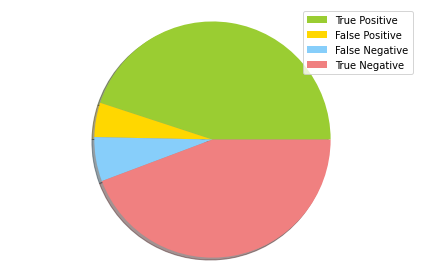

In [ ]:
labels = 'True Positive','False Positive','False Negative','True Negative'
a,b,c,d=c_m3[0][0],c_m3[0][1],c_m3[1][0],c_m3[1][1]
sizes = [a,b,c,d]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model4=LogisticRegression(C=4.281332398719396, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=50, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
model4.fit(x_train_tfidf,y_train)
predLR = model4.predict(x_test_tfidf)


print("Accuracy with best parameters :",accuracy_score(y_test,predLR))

Accuracy with best parameters : 0.9103316500614167


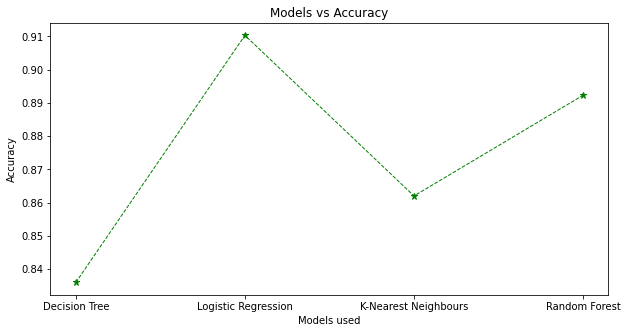

In [ ]:
mod_accuracy=[accuracy_score(y_test,predDT),accuracy_score(y_test,predLR),accuracy_score(y_test,predKNN),accuracy_score(y_test,predRF)]
models=["Decision Tree","Logistic Regression","K-Nearest Neighbours","Random Forest"]

plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'g*',linestyle='dashed',linewidth=1, markersize=7)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()

# Preparing test data

In [ ]:
with open("t.xlsx", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
test_data=pd.read_excel("t.xlsx")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9637 entries, 0 to 9636
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          9637 non-null   float64
 1   Unnamed: 1  0 non-null      float64
 2   tweet       9637 non-null   object 
 3   state       9637 non-null   object 
 4   SUBJECT     9637 non-null   object 
 5   Unnamed: 5  0 non-null      float64
 6   label       9637 non-null   object 
dtypes: float64(3), object(4)
memory usage: 527.1+ KB


In [ ]:
test_data.head(10)

,id,Unnamed: 1,tweet,state,SUBJECT,Unnamed: 5,label
0,1.0,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",Alabama,DONALD TRUMP,NaN,Negative
1,2.0,NaN,Donald Trump literally appointed three Suprem...,Alabama,DONALD TRUMP,NaN,Negative
2,3.0,NaN,This story holy shit!,Alabama,DONALD TRUMP,NaN,Negative
3,4.0,NaN,Pollak: 11 Shining Successes of President Don...,Alabama,DONALD TRUMP,NaN,Negative
4,5.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative
5,6.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative
6,7.0,NaN,NBC is trying to dupe you into thinking the B...,Alabama,JOE BIDEN,NaN,Negative
7,8.0,NaN,"Joe Biden isnâ€™t stupid, he has Dementia.The...",Alabama,JOE BIDEN,NaN,Negative
8,9.0,NaN,Now that NBC has exposed the bogus Hunter Bid...,Alabama,JOE BIDEN,NaN,Negative
9,10.0,NaN,Omg CNN you are worse than MARSHA MARSHA MARS...,Alabama,JOE BIDEN,NaN,Negative


In [ ]:
def process_tweet():
    return ",".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower().split()))

In [ ]:
test_data['processed_tweets'] = test_data['tweet'].str.replace('[^A-Za-z0-9 ]', '')
test_data['processed_tweets'] = test_data['processed_tweets'].str.replace('@[a-zA-Z0-9]+', '')

#test_data['processed_tweet'] = test_data['tweet'].apply(process_tweet)

test_data.head(10)

,id,Unnamed: 1,tweet,state,SUBJECT,Unnamed: 5,label,processed_tweets
0,1.0,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",Alabama,DONALD TRUMP,NaN,Negative,Donald Trump Jr Why arent they talking about ...
1,2.0,NaN,Donald Trump literally appointed three Suprem...,Alabama,DONALD TRUMP,NaN,Negative,Donald Trump literally appointed three Suprem...
2,3.0,NaN,This story holy shit!,Alabama,DONALD TRUMP,NaN,Negative,This story holy shit
3,4.0,NaN,Pollak: 11 Shining Successes of President Don...,Alabama,DONALD TRUMP,NaN,Negative,Pollak 11 Shining Successes of President Dona...
4,5.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,GDP rose last quarter but visits to food bank...
5,6.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,GDP rose last quarter but visits to food bank...
6,7.0,NaN,NBC is trying to dupe you into thinking the B...,Alabama,JOE BIDEN,NaN,Negative,NBC is trying to dupe you into thinking the B...
7,8.0,NaN,"Joe Biden isnâ€™t stupid, he has Dementia.The...",Alabama,JOE BIDEN,NaN,Negative,Joe Biden isnt stupid he has DementiaThe peop...
8,9.0,NaN,Now that NBC has exposed the bogus Hunter Bid...,Alabama,JOE BIDEN,NaN,Negative,Now that NBC has exposed the bogus Hunter Bid...
9,10.0,NaN,Omg CNN you are worse than MARSHA MARSHA MARS...,Alabama,JOE BIDEN,NaN,Negative,Omg CNN you are worse than MARSHA MARSHA MARS...


In [ ]:
test_data['processed_tweets'] = test_data['processed_tweets'].apply(lambda x: x.split())
test_data.head(10)

,id,Unnamed: 1,tweet,state,SUBJECT,Unnamed: 5,label,processed_tweets
0,1.0,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",Alabama,DONALD TRUMP,NaN,Negative,"[Donald, Trump, Jr, Why, arent, they, talking,..."
1,2.0,NaN,Donald Trump literally appointed three Suprem...,Alabama,DONALD TRUMP,NaN,Negative,"[Donald, Trump, literally, appointed, three, S..."
2,3.0,NaN,This story holy shit!,Alabama,DONALD TRUMP,NaN,Negative,"[This, story, holy, shit]"
3,4.0,NaN,Pollak: 11 Shining Successes of President Don...,Alabama,DONALD TRUMP,NaN,Negative,"[Pollak, 11, Shining, Successes, of, President..."
4,5.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,"[GDP, rose, last, quarter, but, visits, to, fo..."
5,6.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,"[GDP, rose, last, quarter, but, visits, to, fo..."
6,7.0,NaN,NBC is trying to dupe you into thinking the B...,Alabama,JOE BIDEN,NaN,Negative,"[NBC, is, trying, to, dupe, you, into, thinkin..."
7,8.0,NaN,"Joe Biden isnâ€™t stupid, he has Dementia.The...",Alabama,JOE BIDEN,NaN,Negative,"[Joe, Biden, isnt, stupid, he, has, DementiaTh..."
8,9.0,NaN,Now that NBC has exposed the bogus Hunter Bid...,Alabama,JOE BIDEN,NaN,Negative,"[Now, that, NBC, has, exposed, the, bogus, Hun..."
9,10.0,NaN,Omg CNN you are worse than MARSHA MARSHA MARS...,Alabama,JOE BIDEN,NaN,Negative,"[Omg, CNN, you, are, worse, than, MARSHA, MARS..."


In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
test_data['processed_tweets']= test_data['processed_tweets'].apply(lambda x: [stemmer.stem(i) for i in x])
test_data.head(10)

,id,Unnamed: 1,tweet,state,SUBJECT,Unnamed: 5,label,processed_tweets
0,1.0,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",Alabama,DONALD TRUMP,NaN,Negative,"[donald, trump, jr, whi, arent, they, talk, ab..."
1,2.0,NaN,Donald Trump literally appointed three Suprem...,Alabama,DONALD TRUMP,NaN,Negative,"[donald, trump, liter, appoint, three, suprem,..."
2,3.0,NaN,This story holy shit!,Alabama,DONALD TRUMP,NaN,Negative,"[this, stori, holi, shit]"
3,4.0,NaN,Pollak: 11 Shining Successes of President Don...,Alabama,DONALD TRUMP,NaN,Negative,"[pollak, 11, shine, success, of, presid, donal..."
4,5.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,"[gdp, rose, last, quarter, but, visit, to, foo..."
5,6.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,"[gdp, rose, last, quarter, but, visit, to, foo..."
6,7.0,NaN,NBC is trying to dupe you into thinking the B...,Alabama,JOE BIDEN,NaN,Negative,"[nbc, is, tri, to, dupe, you, into, think, the..."
7,8.0,NaN,"Joe Biden isnâ€™t stupid, he has Dementia.The...",Alabama,JOE BIDEN,NaN,Negative,"[joe, biden, isnt, stupid, he, has, dementiath..."
8,9.0,NaN,Now that NBC has exposed the bogus Hunter Bid...,Alabama,JOE BIDEN,NaN,Negative,"[now, that, nbc, has, expos, the, bogus, hunte..."
9,10.0,NaN,Omg CNN you are worse than MARSHA MARSHA MARS...,Alabama,JOE BIDEN,NaN,Negative,"[omg, cnn, you, are, wors, than, marsha, marsh..."


In [ ]:
def process(text):
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    nopunc = " ".join(nopunc)
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

test_data['processed_tweets'] = test_data['processed_tweets'].apply(process)
test_data.head(10)

,id,Unnamed: 1,tweet,state,SUBJECT,Unnamed: 5,label,processed_tweets
0,1.0,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",Alabama,DONALD TRUMP,NaN,Negative,"[talk, donald, death, oh, number, weve, noth, ..."
1,2.0,NaN,Donald Trump literally appointed three Suprem...,Alabama,DONALD TRUMP,NaN,Negative,"[donald, trump, suprem, liter, court, entir, j..."
2,3.0,NaN,This story holy shit!,Alabama,DONALD TRUMP,NaN,Negative,"[holi, shit, stori]"
3,4.0,NaN,Pollak: 11 Shining Successes of President Don...,Alabama,DONALD TRUMP,NaN,Negative,"[11, donald, first, via, trump, pollak, succes..."
4,5.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,"[food, havent, track, visit, grown, econom, gd..."
5,6.0,NaN,"GDP rose last quarter, but visits to food ban...",Alabama,DONALD TRUMP,NaN,Negative,"[food, havent, track, visit, grown, econom, gd..."
6,7.0,NaN,NBC is trying to dupe you into thinking the B...,Alabama,JOE BIDEN,NaN,Negative,"[tri, scandal, ab, nbc, biden, notthi, paytopl..."
7,8.0,NaN,"Joe Biden isnâ€™t stupid, he has Dementia.The...",Alabama,JOE BIDEN,NaN,Negative,"[peopl, biden, dementiath, vote, stupid, isnt,..."
8,9.0,NaN,Now that NBC has exposed the bogus Hunter Bid...,Alabama,JOE BIDEN,NaN,Negative,"[aspen, bogus, nbc, biden, behind, hunter, fak..."
9,10.0,NaN,Omg CNN you are worse than MARSHA MARSHA MARS...,Alabama,JOE BIDEN,NaN,Negative,"[marsha, biden, omg, wors, marshawhi, joe, evi..."


In [ ]:
test_data['processed_tweets'] = test_data['processed_tweets'].apply(join_tokens)

In [ ]:

test_counts = count_vect.transform(test_data['processed_tweets'])


print(test_counts.shape)

(9637, 130470)


In [ ]:

test_tfidf = transformer.transform(test_counts)

print(test_tfidf.shape)

(9637, 130470)


In [ ]:
predictions = model4.predict(test_tfidf)

In [ ]:

tweets_trump = test_data[test_data.SUBJECT == 'DONALD TRUMP']

tweets_trump.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5201 entries, 0 to 9636
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5201 non-null   float64
 1   Unnamed: 1        0 non-null      float64
 2   tweet             5201 non-null   object 
 3   state             5201 non-null   object 
 4   SUBJECT           5201 non-null   object 
 5   Unnamed: 5        0 non-null      float64
 6   label             5201 non-null   object 
 7   processed_tweets  5201 non-null   object 
dtypes: float64(3), object(5)
memory usage: 365.7+ KB


In [ ]:
tweets_biden = test_data[test_data.SUBJECT == 'JOE BIDEN']

tweets_biden.head()
tweets_biden.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4436 entries, 6 to 9628
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4436 non-null   float64
 1   Unnamed: 1        0 non-null      float64
 2   tweet             4436 non-null   object 
 3   state             4436 non-null   object 
 4   SUBJECT           4436 non-null   object 
 5   Unnamed: 5        0 non-null      float64
 6   label             4436 non-null   object 
 7   processed_tweets  4436 non-null   object 
dtypes: float64(3), object(5)
memory usage: 311.9+ KB


Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states')

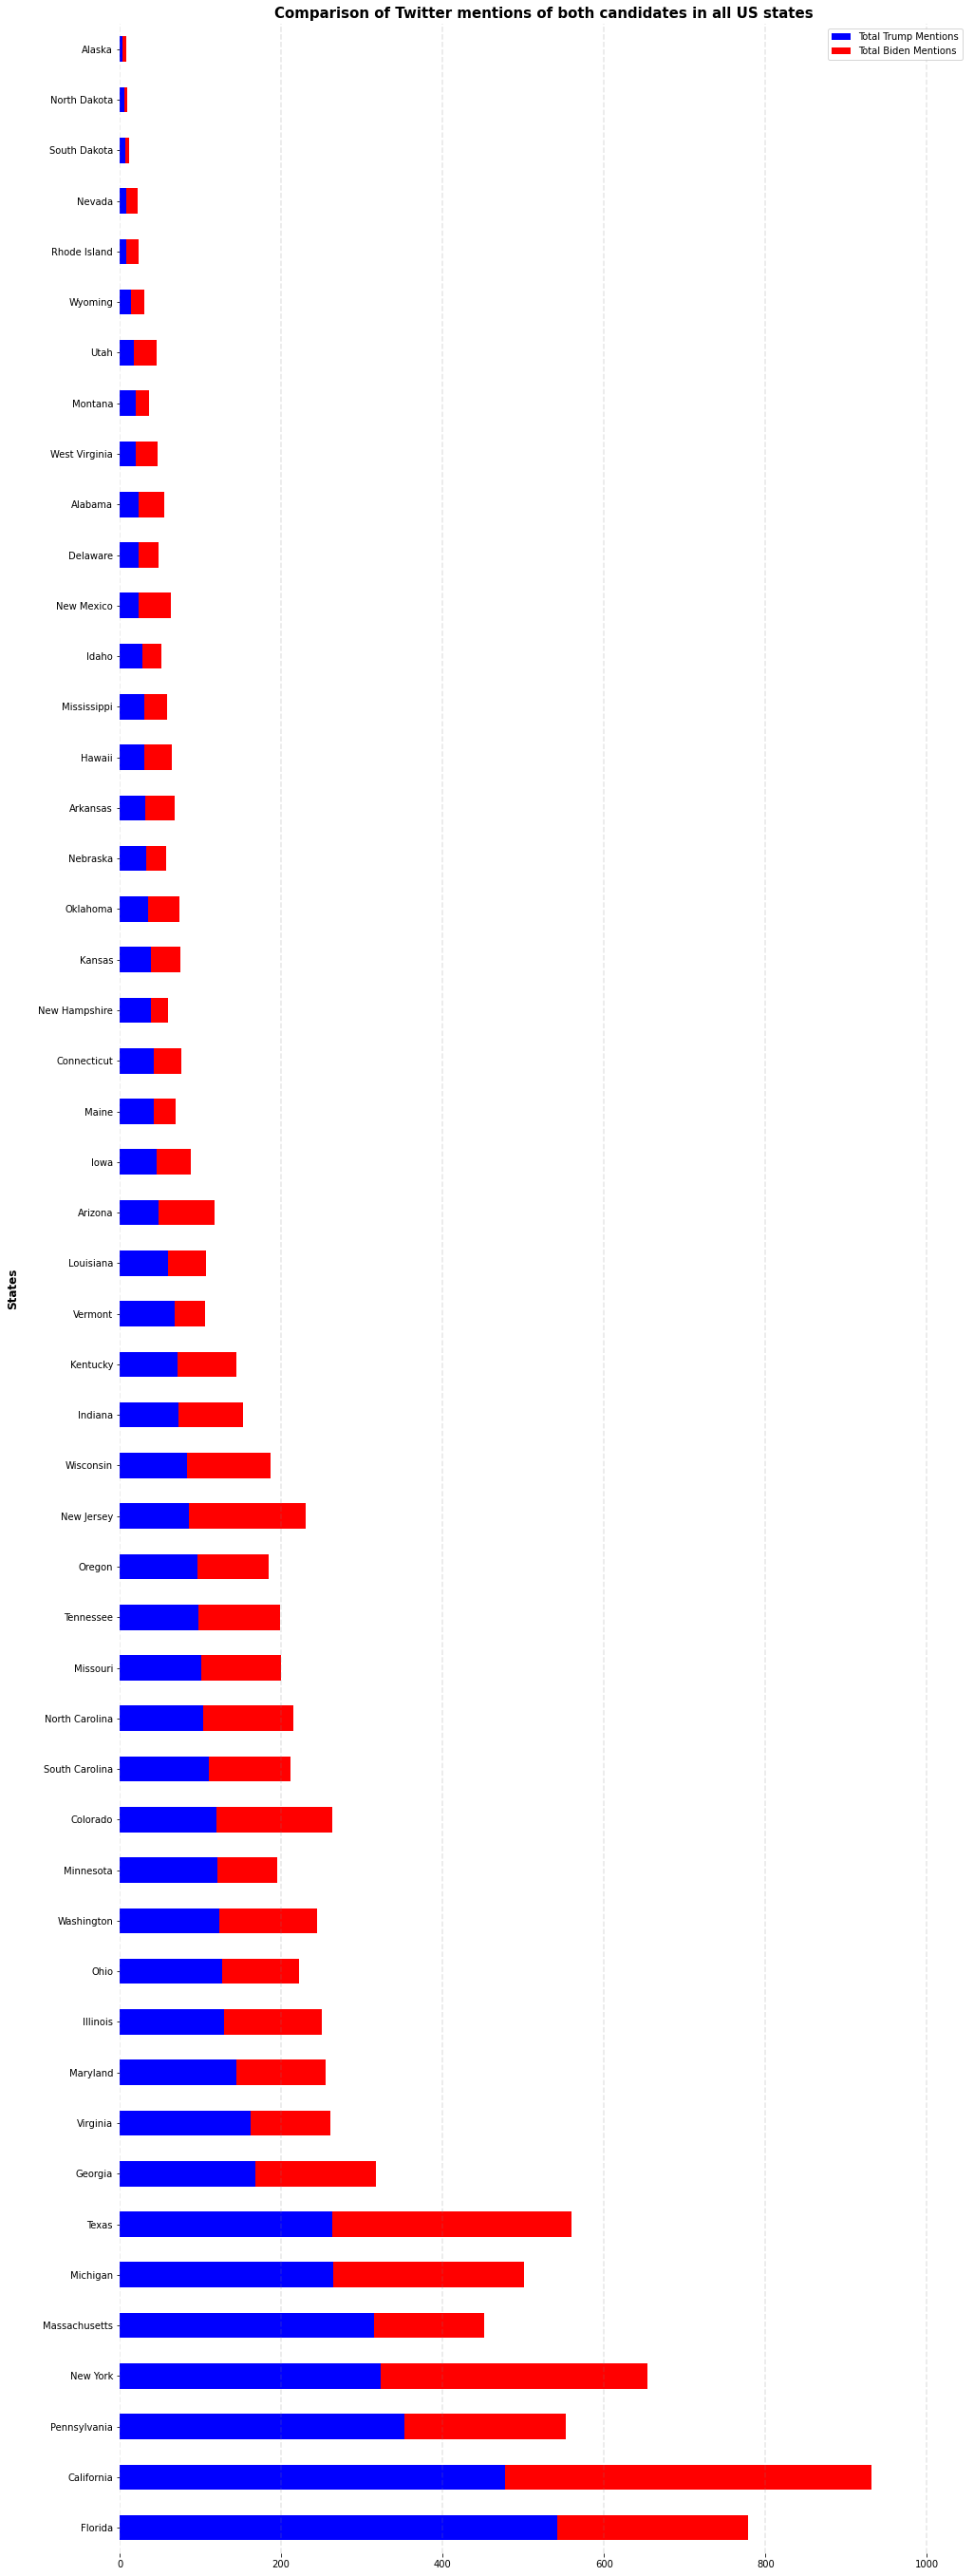

In [ ]:
from itertools import cycle, islice
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
my_colors=list(islice(cycle(["b",'r']),None, len(df)))
ax = df.plot(kind='barh', figsize=(16,49), zorder=2, color=my_colors, stacked= True)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.2, color='grey', zorder=3)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states',fontweight="bold", size=15)

In [ ]:
tweets_trump_location = tweets_trump.groupby(['state', 'label']).count()
tweets_trump_location = tweets_trump_location['id']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)
   

state           label   
Alabama         Negative     11
                Positive     12
Alaska          Negative      2
                Positive      1
Arizona         Negative     36
                Positive     12
Arkansas        Negative     13
                Positive     19
California      Negative    298
                Positive    179
Colorado        Negative     72
                Positive     48
Connecticut     Negative     35
                Positive      7
Delaware        Negative     19
                Positive      4
Florida         Negative    299
                Positive    243
Georgia         Negative     93
                Positive     75
Hawaii          Negative     18
                Positive     13
Idaho           Negative     15
                Positive     13
Illinois        Negative     84
                Positive     45
Indiana         Negative     35
                Positive     38
Iowa            Negative     13
                Positive     33
Kansas         

In [ ]:
tweets_biden_location = tweets_biden.groupby(['state', 'label']).count()
tweets_biden_location = tweets_biden_location['id']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)
    
    

state           label   
Alabama         Negative     20
                Positive     12
Alaska          Negative      3
                Positive      2
Arizona         Negative     36
                Positive     33
Arkansas        Negative     18
                Positive     18
California      Negative    257
                Positive    197
Colorado        Negative     76
                Positive     67
Connecticut     Negative     24
                Positive     10
Delaware        Negative     12
                Positive     13
Florida         Negative    148
                Positive     88
Georgia         Negative     83
                Positive     66
Hawaii          Negative     12
                Positive     22
Idaho           Negative     18
                Positive      6
Illinois        Negative     68
                Positive     54
Indiana         Negative     42
                Positive     38
Iowa            Negative     18
                Positive     24
Kansas         

In [118]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                        
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                        
                                         'Biden Total': [0 for state in states],
                                         'Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump,  positiveBiden, negativeBiden,  = 0, 0, 0, 0
  
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0

  totalTrump = positiveTrump + negativeTrump 
  totalBiden = positiveBiden + negativeBiden 

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'] = 0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = positiveTrump
    tweets_location_df.at[state, 'Trump Negative'] = negativeTrump
    
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'],  = 0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = positiveBiden
    tweets_location_df.at[state, 'Biden Negative'] = negativeBiden
   
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
  total =totalBiden+totalTrump
  tweets_location_df.at[state, 'Total'] = total

tweets_location_df

,Trump Positive,Trump Negative,Trump Total,Biden Positive,Biden Negative,Biden Total,Total
State,,,,,,,
Alabama,12,11,23,12,20,32,55
Alaska,1,2,3,2,3,5,8
Arizona,12,36,48,33,36,69,117
Arkansas,19,13,32,18,18,36,68
California,179,298,477,197,257,454,931
Colorado,48,72,120,67,76,143,263
Connecticut,7,35,42,10,24,34,76
Delaware,4,19,23,13,12,25,48
Florida,243,299,542,88,148,236,778


In [119]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and row['Trump Negative'] < row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and row['Biden Negative'] < row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive ', 
                                                        'Trump Negative': 'Trump Negative ',
                                                        
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive ',
                                                        'Biden Negative': 'Biden Negative ',
                                                        
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive,Trump Negative,Trump Total Mentions,Biden Positive,Biden Negative,Biden Total Mentions,Total,Predicted Judgement
State,,,,,,,,
Alabama,12,11,23,12,20,32,55,Somewhat Republican
Alaska,1,2,3,2,3,5,8,Insufficient Data
Arizona,12,36,48,33,36,69,117,Somewhat Democratic
Arkansas,19,13,32,18,18,36,68,Strongly Republican
California,179,298,477,197,257,454,931,Strongly Democratic
Colorado,48,72,120,67,76,143,263,Somewhat Democratic
Connecticut,7,35,42,10,24,34,76,Strongly Democratic
Delaware,4,19,23,13,12,25,48,Strongly Democratic
Florida,243,299,542,88,148,236,778,Somewhat Republican


In [120]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data       3
Somewhat Democratic    14
Somewhat Republican     9
Strongly Democratic    12
Strongly Republican    12
dtype: int64

In [121]:
d=tweets_location_df[['Predicted Judgement']]
d.groupby(['Predicted Judgement','State']).count()


Empty DataFrame
Columns: []
Index: [(Insufficient Data, Alaska), (Insufficient Data, North Dakota), (Insufficient Data, South Dakota), (Somewhat Democratic, Arizona), (Somewhat Democratic, Colorado), (Somewhat Democratic, Georgia), (Somewhat Democratic, Maine), (Somewhat Democratic, Michigan), (Somewhat Democratic, Minnesota), (Somewhat Democratic, Nevada), (Somewhat Democratic, New Hampshire), (Somewhat Democratic, New Mexico), (Somewhat Democratic, North Carolina), (Somewhat Democratic, Pennsylvania), (Somewhat Democratic, Rhode Island), (Somewhat Democratic, Virginia), (Somewhat Democratic, Wisconsin), (Somewhat Republican, Alabama), (Somewhat Republican, Florida), (Somewhat Republican, Indiana), (Somewhat Republican, Louisiana), (Somewhat Republican, Mississippi), (Somewhat Republican, Nebraska), (Somewhat Republican, Ohio), (Somewhat Republican, Texas), (Somewhat Republican, Wyoming), (Strongly Democratic, California), (Strongly Democratic, Connecticut), (Strongly Democratic, Delaware), (Strongly Democratic, Hawaii), (Strongly Democratic, Illinois), (Strongly Democratic, Maryland), (Strongly Democratic, Massachusetts), (Strongly Democratic, New Jersey), (Strongly Democratic, New York), (Strongly Democratic, Oregon), (Strongly Democratic, Vermont), (Strongly Democratic, Washington), (Strongly Republican, Arkansas), (Strongly Republican, Idaho), (Strongly Republican, Iowa), (Strongly Republican, Kansas), (Strongly Republican, Kentucky), (Strongly Republican, Missouri), (Strongly Republican, Montana), (Strongly Republican, Oklahoma), (Strongly Republican, South Carolina), (Strongly Republican, Tennessee), (Strongly Republican, Utah), (Strongly Republican, West Virginia)]

In [122]:
#final_result = pd.DataFrame({'id':test_data['id'],'label':predictions,'processed tweet':test_data['processed_tweets'], 'state':test_data['location']})
tweets_location_df.to_csv('output.csv',index=False)

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
